### Calculation of the ratio S/N

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#In[2]:
# define function
import src.SAT_function as data_process
import src.Data_Preprocess as preprosess

In [2]:
# print(xr.backends.list_engines())

In [3]:
# import cmocean

In [4]:
import src.slurm_cluster as scluster
client, scluster = scluster.init_dask_slurm_cluster()

#!/usr/bin/env bash

#SBATCH -J dask-worker
#SBATCH -e /scratch/m/m301036/dask_logs//dask-worker-%J.err
#SBATCH -o /scratch/m/m301036/dask_logs//dask-worker-%J.out
#SBATCH -p compute
#SBATCH -A mh0033
#SBATCH -n 1
#SBATCH --cpus-per-task=64
#SBATCH --mem=256G
#SBATCH -t 01:00:00

/home/m/m301036/.conda/envs/mykernel/bin/python -m distributed.cli.dask_worker tcp://10.128.2.77:34459 --name dummy-name --nthreads 1 --memory-limit 4.00GiB --nworkers 64 --nanny --death-timeout 60 --local-directory /scratch/m/m301036/dask_temp/ --interface ib0



In [5]:
# print(client)

### Input both the forced and ICV_std trend data 

In [6]:
# dir_in= '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/LE_evaluation/Fig3_MPI/output/'

# MPI_forced_ds = xr.open_mfdataset(dir_in + 'MIROC6_forced_segmented_trend.nc')
# print(MPI_forced_ds)

In [7]:
dir_ICV = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/LE_evaluation/Fig3_MIROC6/output/'
# Input multiple runs ICV into one dataset with new variable dimension 'run'
variable_indices = np.arange(0, 50, 1).astype(str)
segment_lengths = np.arange(10, 74, 1).astype(str)

# Directory containing input files
dir_ICV = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/LE_evaluation/Fig3_MIROC6/output/'

# Initialize an empty list to collect datasets
datasets = []

for var in variable_indices:
    print(f"Processing run {var}")
    file = dir_ICV + f'MIROC6_ICV_segments_1850_2022_run{var}_trend.nc'
    
    # Open the dataset for the current run
    try:
        ds = xr.open_mfdataset(file, engine="netcdf4",combine='by_coords')
    except FileNotFoundError:
        print(f"File not found: {file}")
        continue
    
    # Expand dimensions to add a `run` dimension
    ds = ds.expand_dims(run=[int(var)])
    datasets.append(ds)

# Combine all datasets along the `run` dimension
if datasets:
    MIROC6_ICV_ds = xr.concat(datasets, dim="run")
    # change the run dimension range from 0-49 to 1-50
    MIROC6_ICV_ds['run'] = np.arange(1, 51, 1)
    print("Datasets successfully combined!")
else:
    print("No datasets were combined.")

Processing run 0
Processing run 1
Processing run 2
Processing run 3
Processing run 4
Processing run 5
Processing run 6
Processing run 7
Processing run 8
Processing run 9
Processing run 10
Processing run 11
Processing run 12
Processing run 13
Processing run 14
Processing run 15
Processing run 16
Processing run 17
Processing run 18
Processing run 19
Processing run 20
Processing run 21
Processing run 22
Processing run 23
Processing run 24
Processing run 25
Processing run 26
Processing run 27
Processing run 28
Processing run 29
Processing run 30
Processing run 31
Processing run 32
Processing run 33
Processing run 34
Processing run 35
Processing run 36
Processing run 37
Processing run 38
Processing run 39
Processing run 40
Processing run 41
Processing run 42
Processing run 43
Processing run 44
Processing run 45
Processing run 46
Processing run 47
Processing run 48
Processing run 49
Datasets successfully combined!


In [8]:
MIROC6_ICV_ds

<xarray.Dataset> Size: 68GB
Dimensions:   (run: 50, segment: 164, lat: 90, lon: 180)
Coordinates:
  * run       (run) int64 400B 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * lon       (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * lat       (lat) float64 720B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
    height    float64 8B 2.0
    variable  <U3 12B 'tas'
  * segment   (segment) int64 1kB 0 1 2 3 4 5 6 ... 157 158 159 160 161 162 163
Data variables: (12/64)
    trend_10  (run, segment, lat, lon) float64 1GB dask.array<chunksize=(1, 164, 90, 180), meta=np.ndarray>
    trend_11  (run, segment, lat, lon) float64 1GB dask.array<chunksize=(1, 164, 90, 180), meta=np.ndarray>
    trend_12  (run, segment, lat, lon) float64 1GB dask.array<chunksize=(1, 164, 90, 180), meta=np.ndarray>
    trend_13  (run, segment, lat, lon) float64 1GB dask.array<chunksize=(1, 164, 90, 180), meta=np.ndarray>
    trend_14  (run, segment, lat, lon) float64 1GB dask.array<chunksize=(1, 164, 90, 180), meta=np.ndarray>
    trend_15  (run, segment, lat, lon) float64 1GB dask.array<chunksize=(1, 164, 90, 180), meta=np.ndarray>
    ...        ...
    trend_68  (run, segment, lat, lon) float64 1GB dask.array<chunksize=(1, 164, 90, 180), meta=np.ndarray>
    trend_69  (run, segment, lat, lon) float64 1GB dask.array<chunksize=(1, 164, 90, 180), meta=np.ndarray>
    trend_70  (run, segment, lat, lon) float64 1GB dask.array<chunksize=(1, 164, 90, 180), meta=np.ndarray>
    trend_71  (run, segment, lat, lon) float64 1GB dask.array<chunksize=(1, 164, 90, 180), meta=np.ndarray>
    trend_72  (run, segment, lat, lon) float64 1GB dask.array<chunksize=(1, 164, 90, 180), meta=np.ndarray>
    trend_73  (run, segment, lat, lon) float64 1GB dask.array<chunksize=(1, 164, 90, 180), meta=np.ndarray>

In [9]:
# Save the combined dataset to a NetCDF file
output_file = dir_ICV + 'MIROC6_ICV_combined_1850_2022.nc'
MIROC6_ICV_ds.to_netcdf(output_file)
print(f"Combined dataset saved to: {output_file}")

Combined dataset saved to: /work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/LE_evaluation/Fig3_MIROC6/output/MIROC6_ICV_combined_1850_2022.nc


In [10]:
# calculate the standard deviation of the ICV
# define function to calculate the standard deviation of the trend pattern of each interval of segments
def std_trend_pattern(data):
    """
    data: 3D array with dimensions [segment, lat, lon]
    segment_number: number of segments
    """
    
    # Calculate the standard deviation of the trend pattern of each interval of segments
    std_trend_pattern = np.nanstd(data, axis=0)
    
    return std_trend_pattern

In [11]:
# calculate standard deviation of the trend pattern of each interval of segments
# apply_ufunc to apply the function to the dataset along the 'segment' dimension
MIROC6_ICV_noise_ds = xr.Dataset()
for segment in segment_lengths:
    print(f"Processing segment {segment}")
    MIROC6_ICV_noise_ds[f'std_trend_{segment}'] = xr.apply_ufunc(std_trend_pattern, 
        MIROC6_ICV_ds[f'trend_{segment}'].chunk({'run': -1}), 
        input_core_dims=[['segment', 'lat', 'lon']], 
        output_core_dims=[['lat', 'lon']], 
        vectorize=True, dask='parallelized', 
        output_dtypes=[float])

Processing segment 10
Processing segment 11
Processing segment 12
Processing segment 13
Processing segment 14
Processing segment 15
Processing segment 16
Processing segment 17
Processing segment 18
Processing segment 19
Processing segment 20
Processing segment 21
Processing segment 22
Processing segment 23
Processing segment 24
Processing segment 25
Processing segment 26
Processing segment 27
Processing segment 28
Processing segment 29
Processing segment 30
Processing segment 31
Processing segment 32
Processing segment 33
Processing segment 34
Processing segment 35
Processing segment 36
Processing segment 37
Processing segment 38
Processing segment 39
Processing segment 40
Processing segment 41
Processing segment 42
Processing segment 43
Processing segment 44
Processing segment 45
Processing segment 46
Processing segment 47
Processing segment 48
Processing segment 49
Processing segment 50
Processing segment 51
Processing segment 52
Processing segment 53
Processing segment 54
Processing

In [12]:
# save the standard deviation of the trend pattern of each interval of segments to a NetCDF file
output_file = dir_ICV + 'MIROC6_ICV_noise_std_trend_pattern_1850_2022.nc'
MIROC6_ICV_noise_ds.to_netcdf(output_file)
print(f"Standard deviation of the trend pattern of each interval of segments saved to: {output_file}")

Standard deviation of the trend pattern of each interval of segments saved to: /work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/LE_evaluation/Fig3_MIROC6/output/MIROC6_ICV_noise_std_trend_pattern_1850_2022.nc


In [13]:
MIROC6_ICV_noise_ds

<xarray.Dataset> Size: 415MB
Dimensions:       (run: 50, lon: 180, lat: 90)
Coordinates:
  * run           (run) int64 400B 1 2 3 4 5 6 7 8 9 ... 43 44 45 46 47 48 49 50
  * lon           (lon) float64 1kB 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * lat           (lat) float64 720B -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
    height        float64 8B 2.0
    variable      <U3 12B 'tas'
Data variables: (12/64)
    std_trend_10  (run, lat, lon) float64 6MB dask.array<chunksize=(50, 90, 180), meta=np.ndarray>
    std_trend_11  (run, lat, lon) float64 6MB dask.array<chunksize=(50, 90, 180), meta=np.ndarray>
    std_trend_12  (run, lat, lon) float64 6MB dask.array<chunksize=(50, 90, 180), meta=np.ndarray>
    std_trend_13  (run, lat, lon) float64 6MB dask.array<chunksize=(50, 90, 180), meta=np.ndarray>
    std_trend_14  (run, lat, lon) float64 6MB dask.array<chunksize=(50, 90, 180), meta=np.ndarray>
    std_trend_15  (run, lat, lon) float64 6MB dask.array<chunksize=(50, 90, 180), meta=np.ndarray>
    ...            ...
    std_trend_68  (run, lat, lon) float64 6MB dask.array<chunksize=(50, 90, 180), meta=np.ndarray>
    std_trend_69  (run, lat, lon) float64 6MB dask.array<chunksize=(50, 90, 180), meta=np.ndarray>
    std_trend_70  (run, lat, lon) float64 6MB dask.array<chunksize=(50, 90, 180), meta=np.ndarray>
    std_trend_71  (run, lat, lon) float64 6MB dask.array<chunksize=(50, 90, 180), meta=np.ndarray>
    std_trend_72  (run, lat, lon) float64 6MB dask.array<chunksize=(50, 90, 180), meta=np.ndarray>
    std_trend_73  (run, lat, lon) float64 6MB dask.array<chunksize=(50, 90, 180), meta=np.ndarray>

In [14]:
plt.rcParams['figure.figsize'] = (8, 10)
plt.rcParams['font.size'] = 16
# plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.right'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['savefig.transparent'] = True

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm, ListedColormap

In [15]:
def plot_trend(trend_data, lats, lons, levels=None, extend=None, cmap=None, 
                                 title="", ax=None, show_xticks=False, show_yticks=False):
    """
    Plot the trend spatial pattern using Robinson projection with significance overlaid.

    Parameters:
    - trend_data: 2D numpy array with the trend values.
    - lats, lons: 1D arrays of latitudes and longitudes.
    - p_values: 2D array with p-values for each grid point.
    - GMST_p_values: 2D array with GMST p-values for each grid point.
    - title: Title for the plot.
    - ax: Existing axis to plot on. If None, a new axis will be created.
    - show_xticks, show_yticks: Boolean flags to show x and y axis ticks.
    
    Returns:
    - contour_obj: The contour object from the plot.
    """
# Create a new figure/axis if none is provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(20, 15), subplot_kw={'projection': ccrs.Robinson()})
        ax.set_global()
        
    contour_obj = ax.contourf(lons, lats, trend_data, levels=levels, extend=extend, cmap=cmap, transform=ccrs.PlateCarree(central_longitude=0))
    # Plot significance masks with different hatches
    # ax.contourf(lons, lats, significance_mask, levels=[0.05, 1.0],hatches=['///'], colors='none', transform=ccrs.PlateCarree())

    ax.coastlines(resolution='110m')
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=1, color='gray', alpha=0.35)

    # Disable labels on the top and right of the plot
    gl.top_labels = False
    gl.right_labels = False

    # Enable labels on the bottom and left of the plot
    gl.bottom_labels = show_xticks
    gl.left_labels = show_yticks
    gl.xformatter = cticker.LongitudeFormatter()
    gl.yformatter = cticker.LatitudeFormatter()
    gl.xlabel_style = {'size': 16}
    gl.ylabel_style = {'size': 16}
    
    if show_xticks:
        gl.bottom_labels = True
    if show_yticks:
        gl.left_labels = True
    
    ax.set_title(title, loc='center', fontsize=24, pad=5.0)

    return contour_obj

In [16]:
# define an asymmetric colormap
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.colors import BoundaryNorm

intervals = [0.0, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]

# Normalizing the intervals to [0, 1]
min_interval = min(intervals)
max_interval = max(intervals)
normalized_intervals = [(val - min_interval) / (max_interval - min_interval) for val in intervals]

# colors = ['#2616D3', '#005EFF', '#0084FF', '#00A2FF', '#00BCDB', (1.0, 1.0, 1.0, 1.0),(1.0, 1.0, 1.0, 1.0),(1.0, 0.8, 0.5, 1.0),
#     (1.0, 0.803921568627451, 0.607843137254902, 1.0), (1.0, 0.6000000000000001, 0.20000000000000018, 1.0),(1.0, 0.4039215686274509, 0.0, 1.0),(0.8999999999999999, 0.19999999999999996, 0.0, 1.0),
#     (0.7470588235294118, 0.0, 0.0, 1.0), (0.6000000000000001, 0.0, 0.0, 1.0),(0.44705882352941173, 0.0, 0.0, 1.0),(0.30000000000000004, 0.0, 0.0, 1.0),(0.14705882352941177, 0.0, 0.0, 1.0),
#     (0.0, 0.0, 0.0, 1.0)]

# Creating a list of tuples with normalized positions and corresponding colors
# color_list = list(zip(normalized_intervals, colors))

# # Create the colormap
# custom_cmap = LinearSegmentedColormap.from_list('my_custom_cmap', color_list)

# # Create a normalization
# norm = Normalize(vmin=min_interval, vmax=max_interval)

In [17]:
import seaborn as sns
import palettable
from palettable.colorbrewer.diverging import RdBu_11_r
import matplotlib.colors as mcolors

cmap = mcolors.ListedColormap(palettable.cmocean.sequential.Amp_20.mpl_colors)

In [18]:
MIROC6_ICV_noise_ds['std_trend_10']

<xarray.DataArray 'std_trend_10' (run: 50, lat: 90, lon: 180)> Size: 6MB
dask.array<transpose, shape=(50, 90, 180), dtype=float64, chunksize=(50, 90, 180), chunktype=numpy.ndarray>
Coordinates:
  * run       (run) int64 400B 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * lon       (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * lat       (lat) float64 720B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
    height    float64 8B 2.0
    variable  <U3 12B 'tas'

In [19]:
r1_std_trend_10 = MIROC6_ICV_noise_ds['std_trend_10'].sel(run=1)

/tmp/ipykernel_2168307/3379958725.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


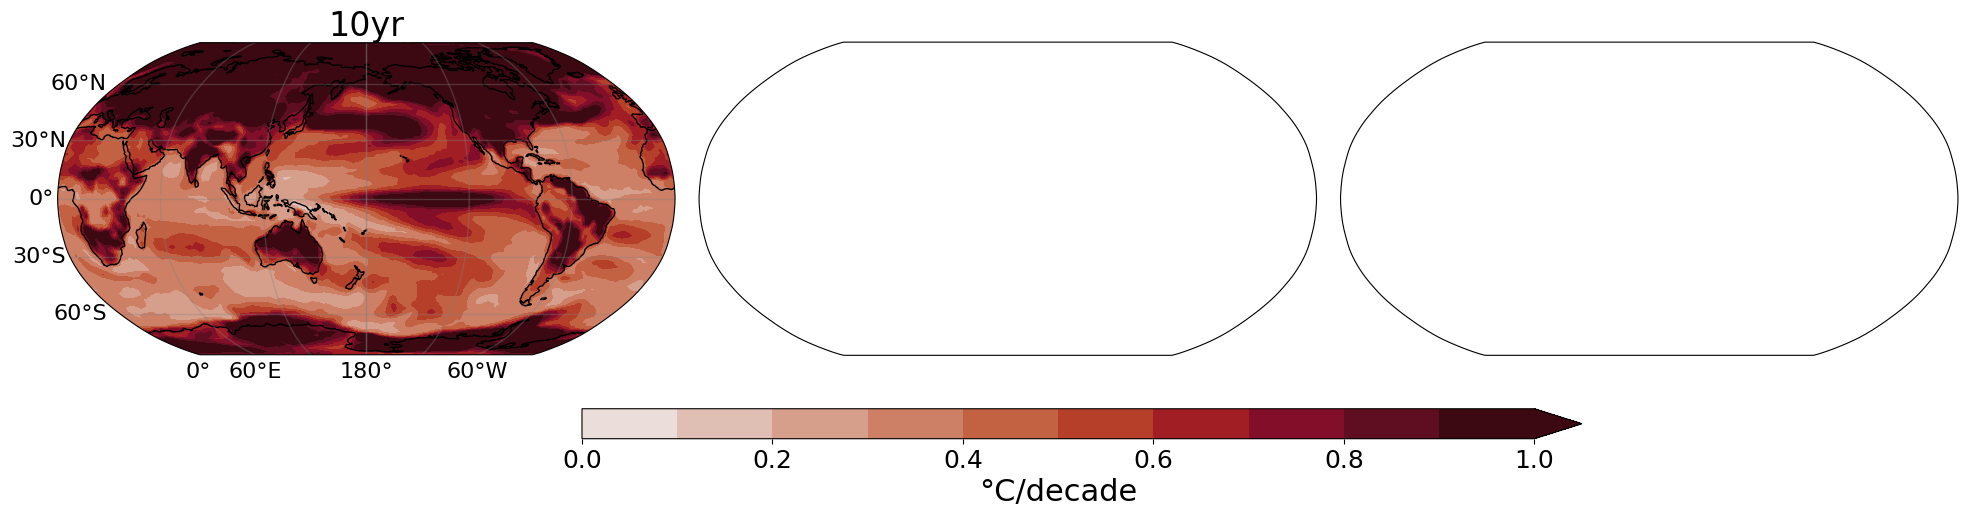

In [20]:
lat = MIROC6_ICV_noise_ds['lat'].values
lon = MIROC6_ICV_noise_ds['lon'].values

titles = ["10yr",  "30yr", "60yr"]

import cartopy.util as cutil
# levels = np.arange(-0.2, 0.25, 0.025)
# Define the GridSpec
fig,ax = plt.subplots(1, 3, figsize=(20, 12), subplot_kw={'projection': ccrs.Robinson(180)})

levels = np.arange(0.0, 1.1, 0.1)

trend_data_10yr = r1_std_trend_10.values
trend_with_cyclic_10yr, lon_with_cyclic = cutil.add_cyclic_point(trend_data_10yr, coord=lon)
contour_obj = plot_trend(trend_with_cyclic_10yr, lat, lon_with_cyclic,levels=levels,extend='max',
                    cmap=cmap,
                    title=titles[0], ax=ax[0], show_xticks = True, show_yticks = True)

# trend_data_30yr = MIROC6_ICV_std_30_ds.values
# trend_with_cyclic_30yr, lon_with_cyclic = cutil.add_cyclic_point(trend_data_30yr, coord=lon)
# contour_obj1 = plot_trend(trend_with_cyclic_30yr, lat, lon_with_cyclic,levels=levels,extend='max',
#                     cmap=cmap,
#                     title=titles[1], ax=ax[1], show_xticks = True, show_yticks = False)

# trend_data_60yr = MIROC6_ICV_std_60_ds.values
# trend_with_cyclic_60yr, lon_with_cyclic = cutil.add_cyclic_point(trend_data_60yr, coord=lon)
# contour_obj2 = plot_trend(trend_with_cyclic_60yr, lat, lon_with_cyclic,levels=levels,extend='max',
#                     cmap=cmap,
#                     title=titles[2], ax=ax[2], show_xticks = True, show_yticks = False)
# sns.color_palette("rocket_r", as_cmap=True)
# Add horizontal colorbars
cbar_ax = fig.add_axes([0.3, 0.3, 0.5, 0.025])
cbar = plt.colorbar(contour_obj, cax=cbar_ax, orientation='horizontal', extend='max')
cbar.ax.tick_params(labelsize=18)
cbar.set_label('°C/decade', fontsize=22)

plt.tight_layout()
fig.savefig('MIROC6_run1_segmentes_ICV_trend_std_patterns_10yr_check.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
MPI_forced_ds['tas'].sel(period='2013-2022')

In [ ]:
# Input the standard deviation of SAT-OBS residuals
dir_std = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/Figure3/data/ICV_STD_whole/'

HadCRUT5_ICV_std_ds = xr.Dataset()
for segment_length in segment_lengths:
    file = dir_std + 'GSAT_HadCRUT5_Internal_Variability_trend_'+segment_length+'yr_segments_1850_2022_std.nc'
    ds = xr.open_mfdataset(file)
    # print(ds)
    variable_name = f'ICV_{segment_length}_std'
    HadCRUT5_ICV_std_ds[variable_name] = ds[f'ICV_segments_{segment_length}yr_trend_std']
    
print(HadCRUT5_ICV_std_ds)

In [ ]:
HadCRUT5_ICV_std_ds

In [ ]:
# define function to calculate the ratio of the trend pattern of each segment to the standard deviation of the trend pattern of each interval of segments
def SNR_trend_pattern(data, std_trend_pattern):
    """
    data: 2D array with dimensions [lat, lon]
    std_trend_pattern: 2D array with dimensions [lat, lon]
    """
    return data/std_trend_pattern

In [ ]:
# Calculate the trend pattern of each segment
#       and calculate the ensemble standard deviation of the trend pattern of each interval of segments
SNR_trend_pattern_ds = xr.Dataset()
for segment_length in segment_lengths:
    variable_name = f'SNR_{segment_length}_trend'
    SNR_trend_pattern_ds[variable_name] = SNR_trend_pattern(HadCRUT5_forced_ds[f'forced_{segment_length}_trend'], HadCRUT5_ICV_std_ds[f'ICV_{segment_length}_std'])

print(SNR_trend_pattern_ds[variable_name])

In [ ]:
SNR_trend_pattern_ds.values

In [ ]:
# check the result max and min
for var in SNR_trend_pattern_ds.data_vars:
    print(var)
    print(SNR_trend_pattern_ds[var].max().values)
    print(SNR_trend_pattern_ds[var].min().values)

In [ ]:
# # save the output 
# dir_out = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/Figure3/data/Ratio/'

# for segment_length in segment_lengths:
#     file_out = dir_out + 'SNR_trend_pattern_HadCRUT5_'+segment_length+'yr_segments_ends_2022.nc'
#     SNR_trend_pattern_ds[f'SNR_{segment_length}_trend'].to_netcdf(file_out)

### Plot the SNR ratio according to the trend length

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 16
# plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.right'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['savefig.transparent'] = True
plt.rcParams['pdf.fonttype'] = 42
# plt.rcParams['legend.frameon']      = False
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm, ListedColormap

In [ ]:
# # define an asymmetric colormap
# from matplotlib.colors import LinearSegmentedColormap, Normalize
# from matplotlib.colors import BoundaryNorm
# # define the color bar with [-1.0, 1.0] in grey and the rest in blue and red-0.75, -0.5, -0.25, 0.25, 0.5, 0.75,

# intervals = [-10.0,-9.0,-8.0,-7.0,-6.0,-5.0,-4.0,-3.0, -2.0, -1.0,-0.75,-0.5, -0.25, 
#             0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

# colors = [
#     [0,19,97],
#     [3,39,110],
#     [3,60,124],
#     [5,81,137],
#     [23,104,153],
#     [57,130,171],
#     [100,159,190],
#     [140,186,208],
#     [182,211,224],
#     [224,230,233], # blue
#     [77,77,77],# grey
#     [135,135,135],
#     [186,186,186],
#     [224,224,224],
#     [186,186,186],
#     [135,135,135],
#     [77,77,77],# grey
#     [238,221,211],# red
#     [229,192,173],
#     [219,168,139],
#     [208,144,107],
#     [198,119,73],
#     [187,96,45],
#     [165,63,15],
#     [137,38,7],
#     [111,18,8],
#     [89,0,9],
#     [255,255,255]
#     ]

# define an asymmetric colormap
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.colors import BoundaryNorm
# define the color bar with [-1.0, 1.0] in grey and the rest in blue and red
# -10.0,-9.0,-8.0,-7.0,-6.0,-5.0,-4.0,-3.0, -2.0, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75,

intervals = [-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
# intervals = np.arange(-1.0, 11.0, 1.0)
# colors = [
#     [186,186,186],
#     # [224,224,224],
#     # [186,186,186],
#     # [135,135,135],
#     # [77,77,77],# grey
#     [235,221,219],# red
#     [223,189,178],
#     [214,159,141],
#     [204,129,104],
#     [208,144,107],
#     [194,96,66],
#     [182,64,41],
#     [161,30,37],
#     [131,14,41],
#     [94,14,33],
#     [60,9,18]
#     ]
# Reds
colors = [
    [186,186,186],
    # [224,224,224],
    # [186,186,186],
    # [135,135,135],
    # [77,77,77],# grey
    [255,245,240],# red
    [254,224,210],
    [252,187,161],
    [252,146,114],
    [251,106,74],
    [239,59,44],
    [203,24,29],
    [165,15,21],
    [103,0,13]
    ]
# colors = [
#     [186,186,186],
#     # [224,224,224],
#     # [186,186,186],
#     # [135,135,135],
#     # [77,77,77],# grey
#     [250,230,197],# red
#     [245,185,152],
#     [237,138,129],
#     [230,113,117],
#     [199,88,108],
#     [156,63,93],
#     [112,40,74]
#     ]

In [ ]:
# colors_normalized = np.array(colors) / 255.0
# cmap =  LinearSegmentedColormap.from_list("custom_colormap", colors_normalized, N=len(colors))

# # Create a BoundaryNorm for mapping colors to the intervals
# norm = BoundaryNorm(intervals, ncolors=cmap.N, clip=True)

In [ ]:
# lat = SNR_trend_pattern_ds.lat.values
# lon = SNR_trend_pattern_ds.lon.values

# titles = ["10-year(2013-2022)", "30-year(1993-2022)", "60-year(1963-2022)"]
# titles_left = ["a", "b", "c"]

# import cartopy.util as cutil

# # Create figure with constrained_layout
# fig = plt.figure(figsize=(15, 10), constrained_layout=True)
# gs = gridspec.GridSpec(3, 1, figure=fig, height_ratios=[1, 1, 1])
# levels = intervals
# extend = 'max'

# # 10-year plot (top-left)
# ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.Robinson(180))

# Ratio_data = SNR_trend_pattern_ds['SNR_10_trend'].values
# Ratio_with_cyclic, lon_with_cyclic = cutil.add_cyclic_point(Ratio_data, coord=lon)
# contour_obj = plot_trend(Ratio_with_cyclic, lat, lon_with_cyclic,levels=levels,extend=extend,
#                     cmap=cmap,
#                     norm=norm,
#                     title=titles[0], ax=ax1, show_xticks = False, show_yticks = True)
# ax1.text(-0.015, 1.08, titles_left[0], fontsize=22, weight='bold', ha='center', va='center',
#             rotation='horizontal', transform=ax1.transAxes)

# # 30-year plot (top-right)
# ax2 = fig.add_subplot(gs[1, 0], projection=ccrs.Robinson(180))

# Ratio_data1 = SNR_trend_pattern_ds['SNR_30_trend'].values
# Ratio_with_cyclic1, lon_with_cyclic = cutil.add_cyclic_point(Ratio_data1, coord=lon)
# contour_obj1 = plot_trend(Ratio_with_cyclic1, lat, lon_with_cyclic,levels=levels,extend=extend,
#                     cmap=cmap,
#                     norm=norm,
#                     title=titles[1], ax=ax2, show_xticks = False, show_yticks = True)
# ax2.text(-0.015, 1.08, titles_left[1], fontsize=22, weight='bold', ha='center', va='center',
#             rotation='horizontal', transform=ax2.transAxes)
# # 60-year plot (bottom-center)
# # fig = plt.figure(figsize=(20, 10))

# ax3 = fig.add_subplot(gs[2, 0], projection=ccrs.Robinson(180))
# # define the figure size and projection
# Ratio_data2 = SNR_trend_pattern_ds['SNR_60_trend'].values
# Ratio_with_cyclic2, lon_with_cyclic = cutil.add_cyclic_point(Ratio_data2, coord=lon)

# contour_obj2 = plot_trend(Ratio_with_cyclic2, lat, lon_with_cyclic,levels=levels,extend=extend,
#                     cmap=cmap,
#                     norm=norm,
#                     title=titles[2], ax=ax3, show_xticks = True, show_yticks = True)
# ax3.text(-0.015, 1.08, titles_left[2], fontsize=22, weight='bold', ha='center', va='center',
#             rotation='horizontal', transform=ax3.transAxes)

# cbar_ax = fig.add_axes([0.34, -0.02, 0.32, 0.02])
# cbar = plt.colorbar(contour_obj, cax=cbar_ax, orientation='horizontal',ticks=[-1.0, 1.0, 2.0, 3.0, 4.0,5.0,
#             6.0, 7.0, 8.0, 9.0, 10.0], extend='max')
# cbar.ax.tick_params(labelsize=14)
# cbar.set_label('Signal/Noise ratio', fontsize=16)

# fig.savefig('SNR_Check.png', dpi=300, bbox_inches='tight')

# plt.show()

### Steps:
1. Stack the SNR values for each trend length: This will give each grid point a series of SNR values corresponding to different trend lengths.
2. Find the first trend length where SNR >= 1.0: For each grid point, check the SNR values across all trend lengths and identify the first trend length where SNR exceeds or equals 1.0.
3. Store the corresponding trend length: Create a 2D array (lat × lon) where each grid point holds the first trend length that meets the SNR condition.
4. Plot the results: Use contour shading to visualize the trend length where SNR first exceeds 1.0.

In [ ]:
# Define the range of trend lengths you're analyzing
trend_lengths = np.arange(10, 74)

# Stack the data into a new dimension for trend lengths
stacked_snr = xr.concat([SNR_trend_pattern_ds[f'SNR_{t}_trend'] for t in trend_lengths], dim='trend_length')
stacked_snr = stacked_snr.assign_coords(trend_length=trend_lengths)

In [ ]:
type(stacked_snr.trend_length)

In [ ]:
# # Define a function to find the first occurrence of SNR >= 1.0
# def first_valid_trend_length(snr_data):
#     # Use np.argmax to find the first index where SNR >= 1.0
#     condition = snr_data >= 1.0
#     first_valid_idx = np.argmax(condition, axis=0)
    
#     # If no valid index is found, set to NaN (ignore if all are less than 1.0)
#     no_valid = np.all(~condition, axis=0)
#     first_valid_idx[no_valid] = np.nan
    
#     return first_valid_idx

In [ ]:
def first_valid_trend_length(snr_values):
    """
    Find the first trend length where SNR >= 1.0.
    
    Args:
    - snr_values (np.ndarray): Array of SNR values for a specific grid point across all trend lengths.
    
    Returns:
    - first_valid_idx (np.ndarray or float): The index of the first trend length where SNR >= 1.0, 
                                             or NaN if no such trend length is found.
    """
    # Mask negative SNR values by treating them as NaN
    # snr_values = np.where(snr_values < 0, np.nan, snr_values)

    # Check where SNR is >= 1.0
    condition = abs(snr_values) > 1.0
    
    # Get the index of the first valid trend length where SNR >= 1.0
    if np.any(condition):
        first_valid_idx = np.argmax(condition, axis=0)
    else:
        first_valid_idx = np.nan  # Return NaN if no trend length satisfies the condition
    
    return first_valid_idx

In [ ]:
trend_lengths

In [ ]:
# Apply the function to find the first trend length where SNR >= 1.0
first_trend_idx = xr.apply_ufunc(
    first_valid_trend_length, 
    stacked_snr.chunk(dict(trend_length=-1)),  # Ensure the data is chunked along the trend_length dimension
    input_core_dims=[['trend_length']],  # Apply function along each grid point
    vectorize=True,                      # Apply in a vectorized way
    dask='parallelized',                 # Enable parallel computation with Dask
    output_dtypes=[float],               # Output will be float (since it may contain NaN)
)

In [ ]:
# Step 1: Convert first_trend_idx to integers, but keep NaNs intact
first_trend_idx_int = first_trend_idx.fillna(-1).astype(int)  # Replace NaNs with -1 temporarily

# Step 2: Map indices to actual trend lengths
first_trend_length_array = xr.DataArray(
    np.where(first_trend_idx_int >= 0, trend_lengths[first_trend_idx_int], np.nan),  # Use trend lengths for valid indices, NaN for invalid
    dims=['lat', 'lon'],  # Keep lat/lon dimensions
    coords={'lat': first_trend_idx.lat, 'lon': first_trend_idx.lon}
)

In [ ]:
print(np.unique(first_trend_length_array.values))

In [ ]:
type(first_trend_length_array)

In [ ]:
print(first_trend_length_array.shape)

In [ ]:
def plot_trend(lons, lats, data, levels=None, extend=None, cmap=None, norm=None,
                                 title="", ax=None, show_xticks=False, show_yticks=False):
    """
    Plot the trend spatial pattern using Robinson projection with significance overlaid.

    Parameters:
    - data: 2D numpy array with the trend values.
    - lats, lons: 1D arrays of latitudes and longitudes.
    - p_values: 2D array with p-values for each grid point.
    - GMST_p_values: 2D array with GMST p-values for each grid point.
    - title: Title for the plot.
    - ax: Existing axis to plot on. If None, a new axis will be created.
    - show_xticks, show_yticks: Boolean flags to show x and y axis ticks.
    
    Returns:
    - contour_obj: The contour object from the plot.
    """
# Create a new figure/axis if none is provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(20, 15), subplot_kw={'projection': ccrs.Robinson()})
        ax.set_global()
        
    # contour_obj = ax.contourf(lons, lats, data, levels=levels, extend=extend, 
    #                         cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
    # Assuming lons, lats, data, levels, cmap, norm, and extend are already defined
    pcolormesh_obj = ax.pcolormesh(lons, lats, data, norm=norm, cmap=cmap, shading='auto',
                                   transform=ccrs.PlateCarree())
    # pcolormesh_obj = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm, 
    # add_colorbar=False)

    # Plot significance masks with different hatches
    # ax.contourf(lons, lats, significance_mask, levels=[0.05, 1.0],hatches=['///'], colors='none', transform=ccrs.PlateCarree())

    ax.coastlines(resolution='110m')
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=1, linestyle='--',
                      color='gray', alpha=0.35)

    # Disable labels on the top and right of the plot
    gl.top_labels = False
    gl.right_labels = False

    # Enable labels on the bottom and left of the plot
    gl.bottom_labels = show_xticks
    gl.left_labels = show_yticks
    gl.xformatter = cticker.LongitudeFormatter()
    gl.yformatter = cticker.LatitudeFormatter()
    gl.xlabel_style = {'size': 16}
    gl.ylabel_style = {'size': 16}
    
    if show_xticks:
        gl.bottom_labels = True
    if show_yticks:
        gl.left_labels = True
    
    ax.set_title(title, loc='center', fontsize=24, pad=5.0)

    return pcolormesh_obj

In [ ]:
# Check for NaN values
nan_indices = np.isnan(first_trend_length_array)

# Now you can print or analyze these points
print("NaN indices:", np.where(nan_indices))


In [ ]:
# # WH box (lat 42 to 60, lon 310 to 350)
# wh_box = first_trend_length_array.sel(lat=slice(42, 60), lon=slice(310, 350))
# print("WH Box First Trend Length Values:\n", wh_box.values)

In [ ]:
# so_box = first_trend_length_array.sel(lat=slice(-90, -42), lon=slice(180, 200))
# print("SO Box First Trend Length Values:\n", so_box.values)

In [ ]:
import copy
import matplotlib as mpl
import matplotlib.colors as mcolors
import palettable
import cartopy.util as cutil
import numpy.ma as ma

# cmdict = cmocean.cm.matter
# norm = mcolors.Normalize(vmin=10, vmax=74)

In [ ]:
print(trend_lengths)

In [ ]:
# Plot the first trend length where SNR >= 1.0
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson(180)})

trend_lengths = np.arange(10, 80, 5)  # Define the range of trend lengths
# Make a copy of the colormap before modifying it
cmap = copy.copy(plt.get_cmap('OrRd_r'))  # Use 'OrRd_r' reversed colormap
# Define BoundaryNorm for discrete colormap intervals
norm = BoundaryNorm(trend_lengths, cmap.N)  # cmap.N defines the number of colors in the colormap

extend = 'neither'  # No extension beyond the colormap range
# cmdict_r = cmdict.reversed()

# Mask invalid data (NaN or Inf values)
masked_array = ma.masked_invalid(first_trend_length_array)

# Add cyclic point to data and longitude
Ratio_with_cyclic, lon_with_cyclic = cutil.add_cyclic_point(masked_array, coord=first_trend_length_array.lon)

# Check the shapes to ensure consistency
print("Shape of Ratio_with_cyclic:", Ratio_with_cyclic.shape)
print("Shape of lon_with_cyclic:", lon_with_cyclic.shape)
print("Shape of SNR_trend_pattern_ds.lat:", SNR_trend_pattern_ds.lat.shape)

# Plot the data (ensure 'contour' is the correct mappable object)
pcolormesh_plot = plot_trend(lon_with_cyclic, SNR_trend_pattern_ds.lat, Ratio_with_cyclic,
                                    levels=trend_lengths, extend=extend, cmap=cmap, norm=norm,
                                        title='Emergence time scale (years)', ax=ax, show_xticks=True, show_yticks=True)


# Add the regional outlines and calculate midpoints for labels:
# Arctic box
arctic_lon_mid = (0 + 360) / 2
arctic_lat_mid = (66.5 + 90) / 2
ax.plot([0, 360, 360, 0, 0], [66.5, 66.5, 90, 90, 66.5],
        color='lightgrey', linewidth=2.0, transform=ccrs.PlateCarree())
ax.text(arctic_lon_mid, arctic_lat_mid, 'ARC', color='black', fontsize=18, transform=ccrs.PlateCarree(),
        ha='center', va='center')  # Label for Arctic

# WH box
wh_lon_mid = (310 + 350) / 2
wh_lat_mid = (42 + 60) / 2
box_lons = np.array([310, 350, 350, 310, 310])
box_lats = np.array([42, 42, 60, 60, 42])
ax.plot(box_lons, box_lats, color='lightgrey', linewidth=2.0, transform=ccrs.PlateCarree())
ax.text(wh_lon_mid, wh_lat_mid, 'NAWH', color='black', fontsize=18, transform=ccrs.PlateCarree(),
        ha='center', va='center')  # Label for WH

# Southeast Pacific box
sep_lon_mid = (200 + 320) / 2
sep_lat_mid = (0 + -25) / 2
ax.plot([200%360, 280%360, 280%360, 250%360, 200%360], [0, 0, -25, -25, 0],
        color='lightgrey', linewidth=2.0, transform=ccrs.PlateCarree())
ax.text(sep_lon_mid, sep_lat_mid, 'SEP', color='black', fontsize=18, transform=ccrs.PlateCarree(),
        ha='center', va='center')  # Label for SEP

# Extratropical South Pacific box
sop_lon_mid = (220 + 280) / 2
sop_lat_mid = (-40 + -60) / 2
ax.plot([220%360, 280%360, 280%360, 220%360, 220%360], [-40, -40, -60, -60, -40],
        color='lightgrey', linewidth=2.0, transform=ccrs.PlateCarree())
ax.text(sop_lon_mid, sop_lat_mid, 'SOP', color='black', fontsize=18, transform=ccrs.PlateCarree(),
        ha='center', va='center')  # Label for SOP
# Add colorbar for the plot

cbar_ax = fig.add_axes([0.275, 0.12, 0.5, 0.04])
cbar = plt.colorbar(pcolormesh_plot, cax=cbar_ax, orientation='horizontal')
# # Customize the colorbar
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Emergence time scale (years)', fontsize=16)

fig.savefig('Emergence_Trend_Length.png', dpi=300, bbox_inches='tight')
fig.savefig('Emergence_Trend_Length.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
pcolormesh_plot.colorbar

In [ ]:
cbar_ax = fig.add_axes([0.275, 0.12, 0.5, 0.04])  # Adjust size and position of the colorbar

In [ ]:
# import xarray as xr
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming SNR_data is your dataset containing the SNR values
# SNR_data = SNR_trend_pattern_ds

# # Get the dimensions for latitude and longitude
# lat_size = SNR_data.dims['lat']
# lon_size = SNR_data.dims['lon']

# # Initialize an array to store the first trend length where SNR >= 1.0 for each grid point
# first_trend_length_array = np.full((lat_size, lon_size), np.nan)

# # Define the range of trend lengths you're analyzing
# trend_lengths = np.arange(10, 74)  # From 10 to 73 years

# # Loop through each grid point (lat, lon)
# for i in range(lat_size):
#     for j in range(lon_size):
#         # Extract the SNR values for the current grid point across all trend lengths
#         snr_values = np.array([SNR_data[f'SNR_{t}_trend'].isel(lat=i, lon=j).values for t in trend_lengths])
        
#         # Find the first trend length where SNR >= 1.0
#         first_valid_index = np.argmax(snr_values >= 1.0) if np.any(snr_values >= 1.0) else None
        
#         # If a valid index is found, mark the corresponding trend length
#         if first_valid_index is not None and snr_values[first_valid_index] >= 1.0:
#             first_trend_length_array[i, j] = trend_lengths[first_valid_index]

# # Plot the first trend length for each grid point where SNR >= 1.0
# plt.figure(figsize=(10, 6))
# plt.contourf(SNR_data.lon, SNR_data.lat, first_trend_length_array, cmap='coolwarm', levels=np.arange(10, 74, 1))
# plt.colorbar(label='First Trend Length (years) with SNR >= 1.0')
# plt.title('First Trend Length where SNR >= 1.0 for each Grid Point')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

# plt.show()


In [ ]:
# client.close()
# scluster.close()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson(180)})
ax.set_global()

p = first_trend_length_array.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=True)
ax.coastlines()



In [ ]:
first_trend_length_array.to_netcdf("/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/Figure3/data/fig3_final/fig3_final.nc")

### 